# The Monty Hall Problem

***

See the [Wikipedia entry](https://en.wikipedia.org/wiki/Monty_Hall_problem) for a summary of the problem.

<br>

## Random door selection

***

Here's some code to pick a door at random.

See [Real Python's Generating Random Data in Python](https://realpython.com/python-random/) for more information.

In [1]:
# Python provides a library called random to generate pseudo-random numbers and do stuff with them.
import random

# The three doors in a list.
doors = ['red', 'green', 'blue']

# Pick a random door.
print(random.choice(doors))

red


<br>

## Checking the randomness

***

The pick is meant to give a one third probability to each door. Let's pick 10,000 doors are see if that looks correct.

In [2]:
# 10,000 random doors.
no_doors = 10000
tenthous = [random.choice(doors) for i in range(no_doors)]

# Count the number of each colour.
red = tenthous.count('red')
blue = tenthous.count('blue')
green = tenthous.count('green')

print("First ten items: ", tenthous[:10])
print(f"Out of the {no_doors}: {red} were red, {green} were green, and {blue} were blue.")

First ten items:  ['blue', 'red', 'red', 'blue', 'red', 'blue', 'green', 'red', 'red', 'green']
Out of the 10000: 3345 were red, 3360 were green, and 3295 were blue.


<br>

Let's plot it and see that each door is picked about a third of the time.

In [3]:
# We'll just use pyplot for plotting.
import matplotlib.pyplot as plt
# Change the way plots look.
plt.style.use('seaborn')

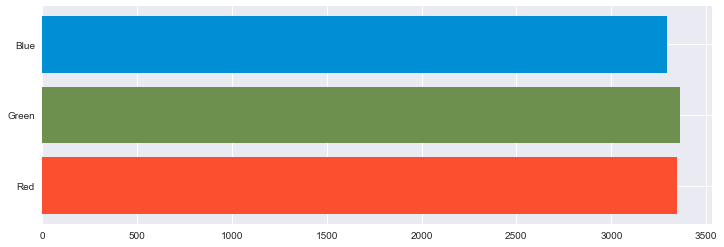

In [4]:
fig, ax = plt.subplots(figsize=(12,4))
ax.barh(['Red', 'Green', 'Blue'], [red, green, blue], color=['#FC4F30', '#6D904F', '#008FD5']);

<br>

## Simulate a game

***

Let's simulate the game now with the following steps:

1. Pick a door to put the car behind.
2. Have the contestant pick a door.
3. Have the show host open one of the other doors to reveal a goat.
4. Ask the contestant if they want to switch.
5. Figure out whether or not the contestant wins.

The question we're looking to answer is whether staying with your original pick makes a difference.

In [6]:
def simulate(stay=True):
    """A function to simulate a game and tell us if the contestant wins.
       The contestant's strategy is to stay with their original choice
       if the parameter stay is True, and otherwise they switch."""
    
    # The three doors.
    doors = ['red', 'green', 'blue']
    
    # 1. Pick a door to put the car behind.
    car = random.choice(doors)
    
    # 2. Have the contestant pick a door.
    pick = random.choice(doors)
    
    # 3. Have the show host open one of the other doors to reveal a goat.
    canopen = [door for door in doors if door != car and door != pick]
    show = random.choice(canopen)

    # 4. Ask the contestant if they want to switch (specified by stay parameter).
    if not stay:
        # This is a bit hacky but gets the job done.
        pick = [door for door in doors if door != pick and door != show][0]
    
    # 5. Figure out whether or not the contestant wins.
    if pick == car:
        return True
    else:
        return False

<br>

We can now simulate a game in which the contestant stays with their original pick by running the following.

A return value of True means they won the car, False means they didn't.

In [7]:
simulate(stay=True)

False

<br>

## Simlulate ten thousand games

***

Let's run the game 10,000 times where the contestant stays.

We'll see how often they win.

In [8]:
staying = [simulate(stay=True) for i in range(10000)]

<br>

Plot the result of staying.

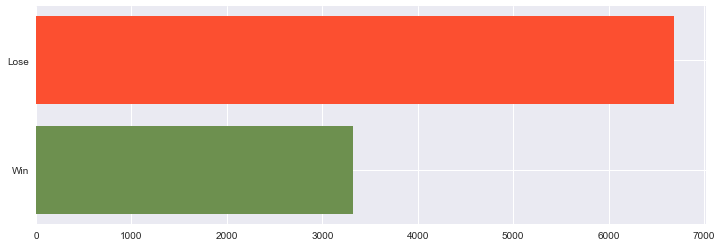

In [9]:
fig, ax = plt.subplots(figsize=(12,4))
ax.barh(['Win', 'Lose'], [staying.count(True), staying.count(False)], color=['#6D904F', '#FC4F30']);

<br>

Looks like when the contestant stays, they win only about a third of the time.

Let's run the game 10,000 times where the contestant switches.

We'll see how often they win.

In [10]:
switching = [simulate(stay=False) for i in range(10000)]

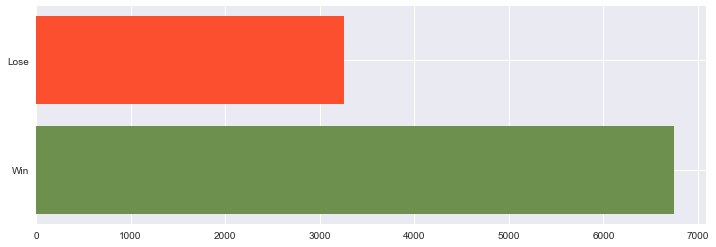

In [11]:
fig, ax = plt.subplots(figsize=(12,4))
ax.barh(['Win', 'Lose'], [switching.count(True), switching.count(False)], color=['#6D904F', '#FC4F30']);

<br>

Looks like you win two thirds of the time if you switch.

## End